In [66]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib notebook
#%matplotlib widget

In [67]:
# Number of pairs feature/label.
M = 100000

In [68]:
# Input values (features)
x1 = 10.0*np.random.randn(M, 1)

# Output values (targets).
y = 2.0 + 2.0*x1 + 10.0*np.random.randn(M, 1)

<IPython.core.display.Javascript object>


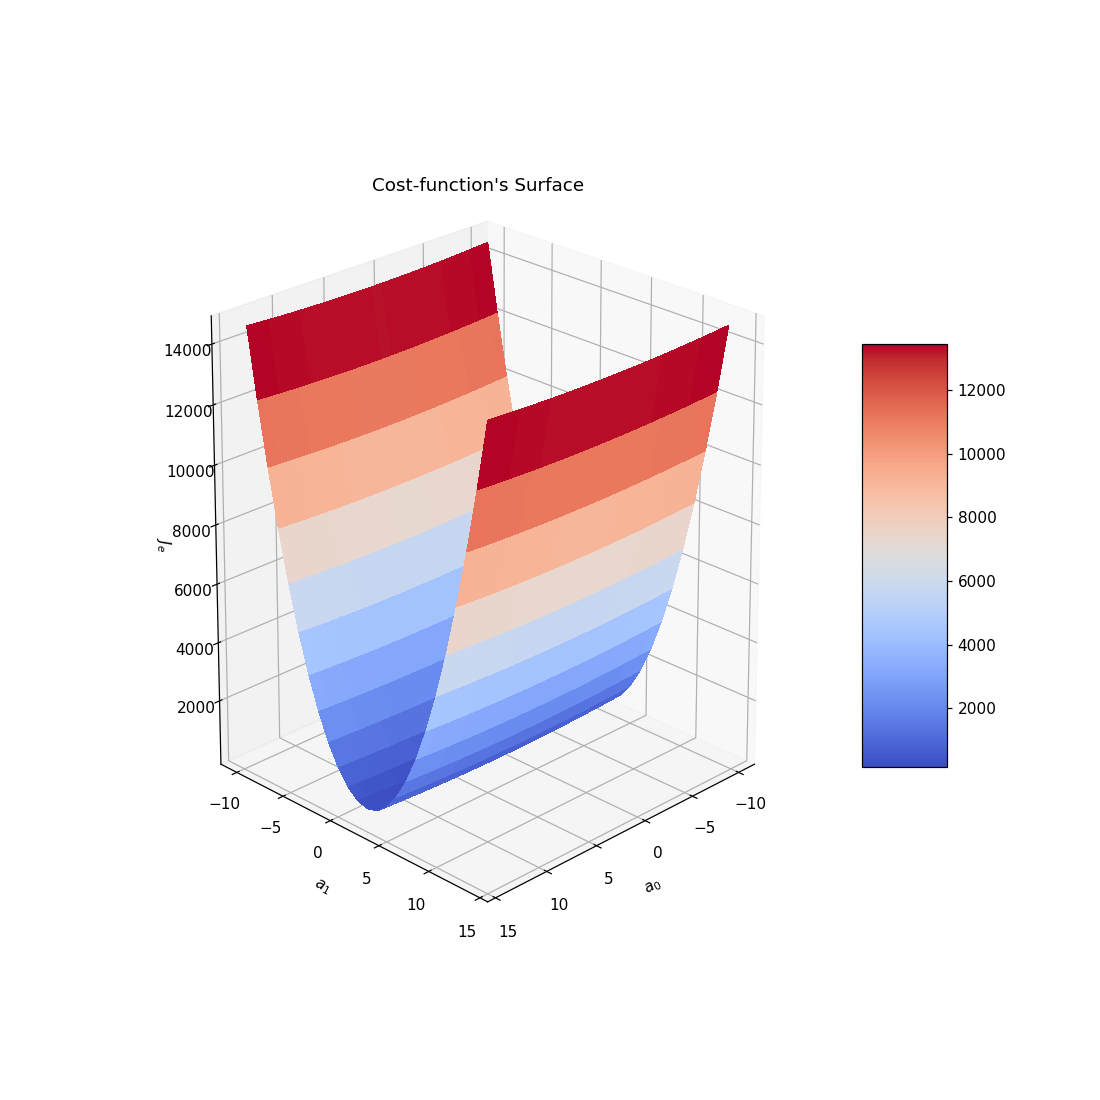

In [69]:
# Generate values for parameters.
N = 25
a0 = np.linspace(-10.0, 14.0, N)
a1 = np.linspace(-10.0, 14.0, N)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    
    for iter2 in range(0, N):
        
        yhat = A0[iter1][iter2] + A1[iter1][iter2]*x1
    
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  );

# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$a_0$')
ax.set_ylabel('$a_1$')
ax.set_zlabel('$J_e$');

plt.title('Cost-function\'s Surface')

ax.view_init(20, 45)
fig

#Show the plot.
plt.show()

In [70]:
# Closed-form solution.
vetor_de_uns = np.ones((M, 1))

X = np.block([vetor_de_uns, x1])

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = a_opt[0, 0] + a_opt[1, 0]*x1

Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [71]:
# Gradient-descent solution.
alpha = 0.002

# Create empty structures.
numMaxIter = 10000
a = np.zeros((2, numMaxIter))
Jgd = np.zeros(numMaxIter)

# Intializa parameters at any location within the parameter's space.
a[0, 0] = -10;
a[1, 0] = -10;

yhat = a[0, 0] + a[1, 0]*x1

Jgd[0] = (1/M)*np.sum(np.power(y - yhat, 2))

error = 1;
iter = 0;
while(error > 0.0001 and iter < numMaxIter-1):
    
    h = a[0, iter] + a[1, iter]*x1;
    
    update = -(2./M)*np.transpose( (y - h) ).dot(X)
    
    a_aux = a[:, iter] - alpha*np.transpose(update)
    
    a[0, iter+1] = a_aux[0,0]
    
    a[1, iter+1] = a_aux[1,0]
    
    yhat = a[0, iter+1] + a[1, iter+1]*x1

    Jgd[iter+1] = (1/M)*sum(np.power(y - yhat, 2))
    
    error = np.abs(Jgd[iter]-Jgd[iter+1])
    
    iter = iter + 1
    
    #print('Error: ' +  str(error) + ' - # iter: ' + str(iter))

<IPython.core.display.Javascript object>


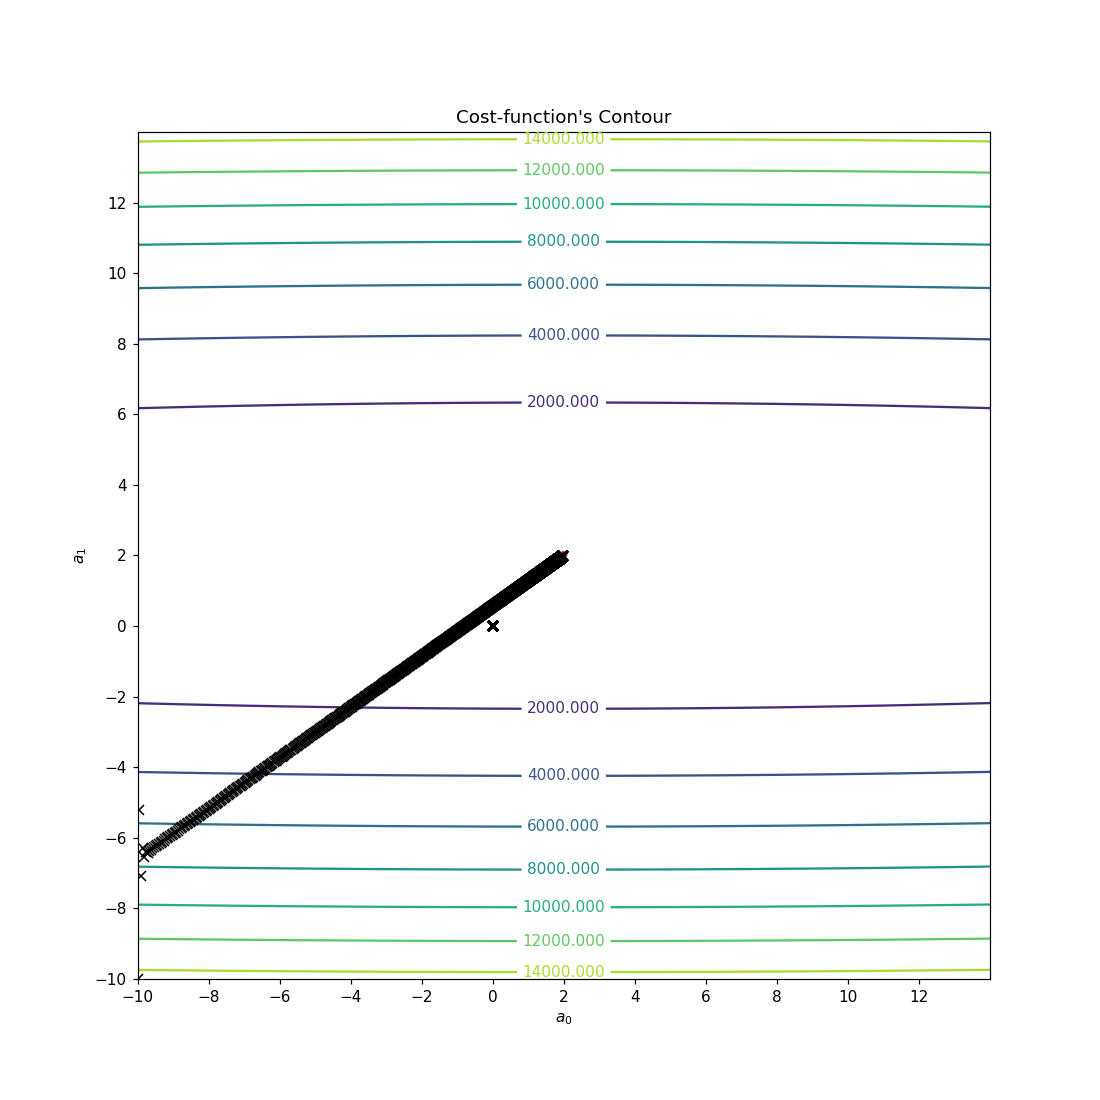

In [72]:
fig = plt.figure(figsize=(10,10))

cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a[0, :], a[1, :], 'kx')

plt.xticks(np.arange(-10, 14, step=2.0))
plt.yticks(np.arange(-10, 14, step=2.0))
plt.show()

<IPython.core.display.Javascript object>


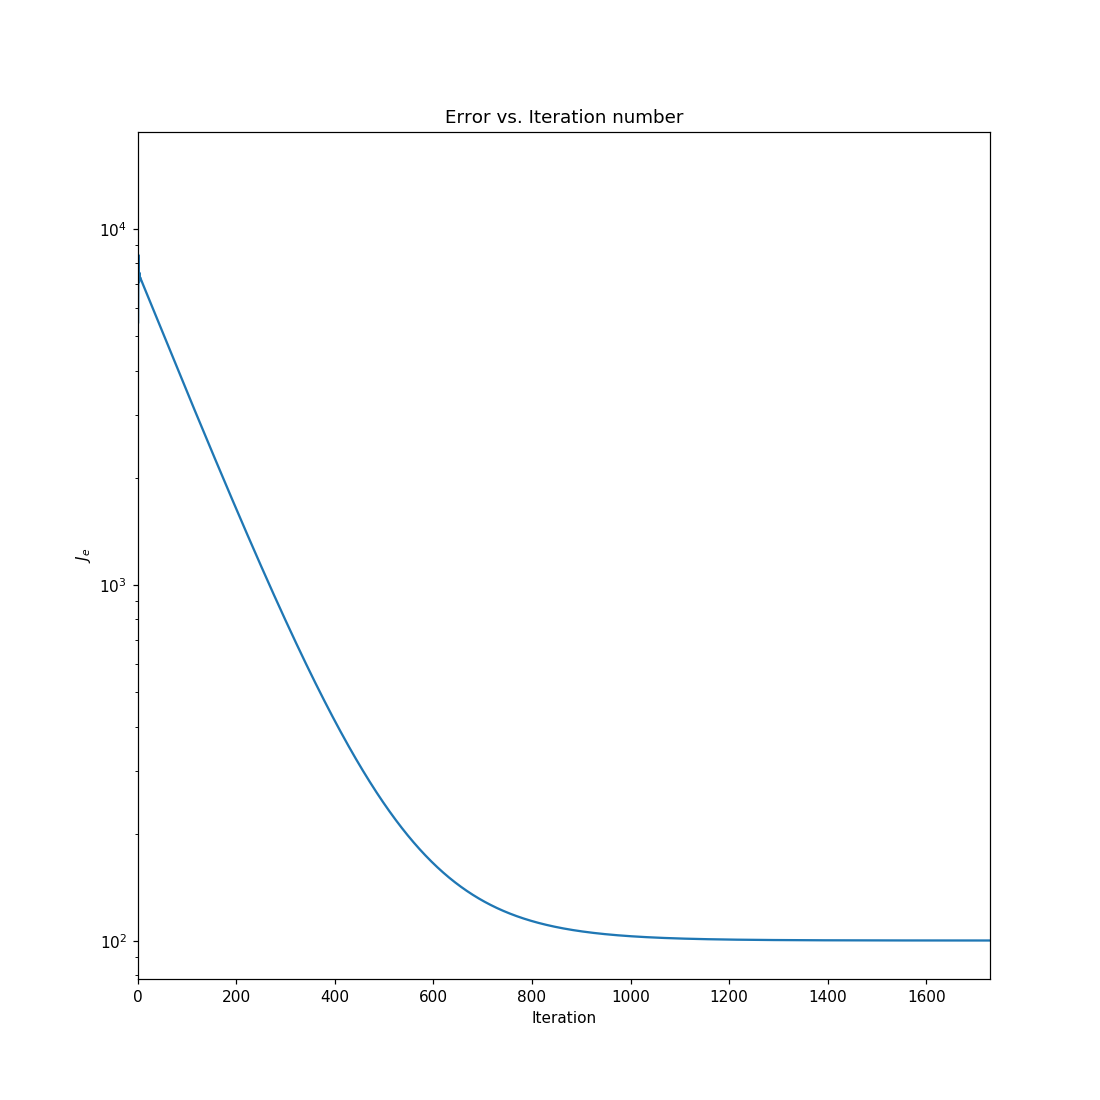

In [73]:
fig = plt.figure(figsize=(10,10))

plt.plot(np.arange(0, iter), Jgd[0:iter])
plt.xlim((0, iter))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()